In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("data.csv")
df.head(5)

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [4]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [7]:
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

### drop unnamed column

In [8]:
df=df.drop('Unnamed: 0',axis=1)
df.head(5)

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [9]:
#change weekly study hours column

In [10]:
df['WklyStudyHours']=df['WklyStudyHours'].str.replace('05-Oct',"5-10")
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [11]:
#gender distribution

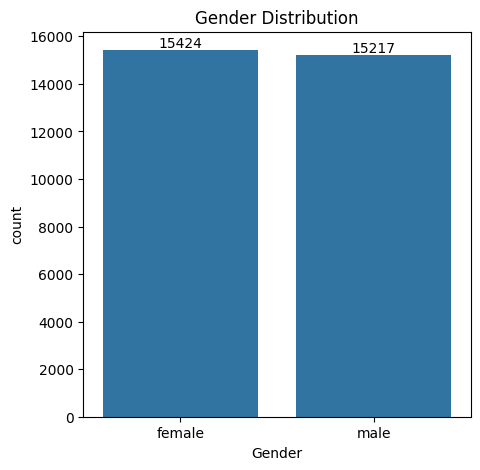

In [38]:
plt.figure(figsize= (5,5))
ax=sns.countplot(data=df,x="Gender")
plt.title("Gender Distribution")
ax.bar_label(ax.containers[0])
plt.show()

In [19]:
#from the above chart we have analysed that:
#the number of females in the data is more than the number of males

In [32]:
#1
gb=df.groupby("ParentEduc").agg({"MathScore":'mean',"ReadingScore":'mean',"WritingScore":'mean'})
#2
gsb=df.groupby("ParentEduc").agg(math_score_mean=('MathScore', 'mean'), reading_score_mean=('ReadingScore','mean'),
                               writing_score_mean=('WritingScore','mean'))
print(gb)

                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
associate's degree  68.365586     71.124324     70.299099
bachelor's degree   70.466627     73.062020     73.331069
high school         64.435731     67.213997     65.421136
master's degree     72.336134     75.832921     76.356896
some college        66.390472     69.179708     68.501432
some high school    62.584013     65.510785     63.632409


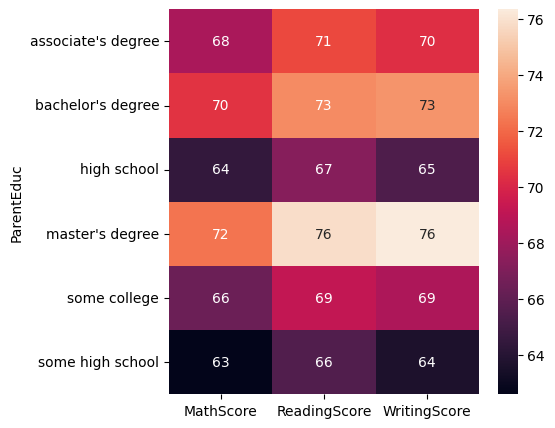

In [35]:
plt.figure(figsize=(5,5))
sns.heatmap(gb,annot=True)
plt.show()

In [36]:
gb1=df.groupby("ParentMaritalStatus").agg({"MathScore":'mean',"ReadingScore":'mean',"WritingScore":'mean'})
print(gb1)

                     MathScore  ReadingScore  WritingScore
ParentMaritalStatus                                       
divorced             66.691197     69.655011     68.799146
married              66.657326     69.389575     68.420981
single               66.165704     69.157250     68.174440
widowed              67.368866     69.651438     68.563452


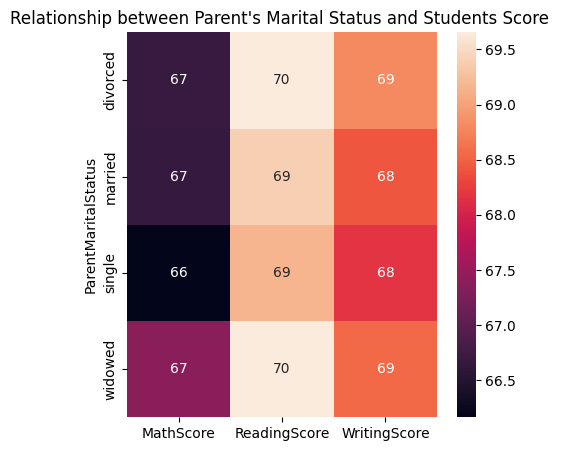

In [39]:
plt.figure(figsize=(5,5))
sns.heatmap(gb1,annot=True)
plt.title("Relationship between Parent's Marital Status and Students Score ")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

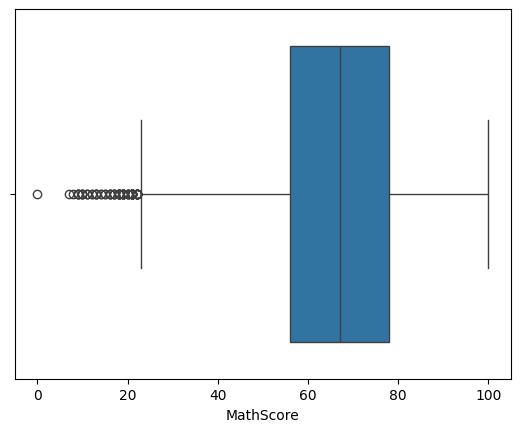

In [40]:
sns.boxplot(data=df,x="MathScore")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

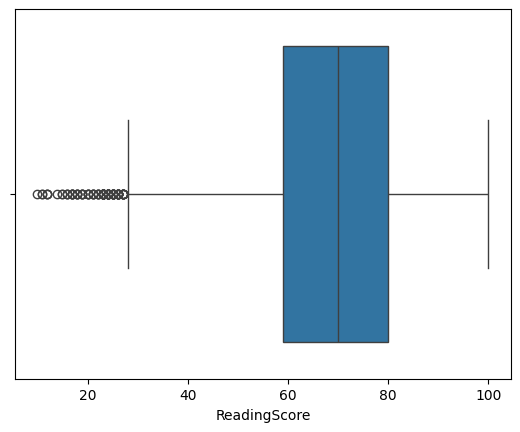

In [41]:
sns.boxplot(data=df,x="ReadingScore")
plt.show

In [42]:
print(df['EthnicGroup'].unique())

[nan 'group C' 'group B' 'group A' 'group D' 'group E']


In [43]:
#distribution of ethnic groups

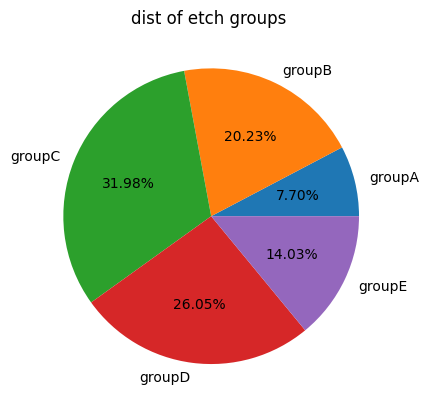

In [63]:
groupA=df.loc[(df['EthnicGroup']=="group A")].count()
groupB=df.loc[(df['EthnicGroup']=="group B")].count()
groupC=df.loc[(df['EthnicGroup']=="group C")].count()
groupD=df.loc[(df['EthnicGroup']=="group D")].count()
groupE=df.loc[(df['EthnicGroup']=="group E")].count()

x =["groupA","groupB","groupC","groupD","groupE"]
mlist=[groupA["EthnicGroup"],groupB["EthnicGroup"],groupC["EthnicGroup"],groupD["EthnicGroup"],groupE["EthnicGroup"]]

plt.pie(mlist,labels=x,autopct="%1.2f%%")
plt.title("dist of etch groups ")
plt.show()


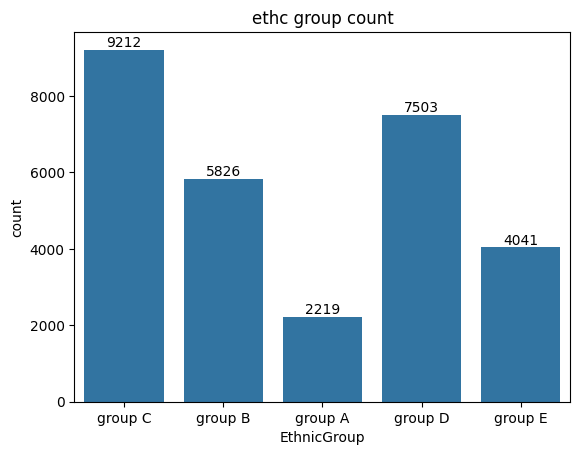

In [64]:
ax=sns.countplot(data=df,x="EthnicGroup")
ax.bar_label(ax.containers[0])
plt.title("ethc group count")
plt.show()

In [67]:
#etnik gruplara göre math,reading ve writing skorları ortalaması

gb2=df.groupby("EthnicGroup").agg({"MathScore":'mean',"ReadingScore":'mean',"WritingScore":'mean'})
print(gb2)


             MathScore  ReadingScore  WritingScore
EthnicGroup                                       
group A      62.991888     66.787742     65.251915
group B      63.490216     67.320460     65.895125
group C      64.695723     68.438233     66.999240
group D      67.666400     70.382247     70.890844
group E      75.298936     74.251423     72.677060


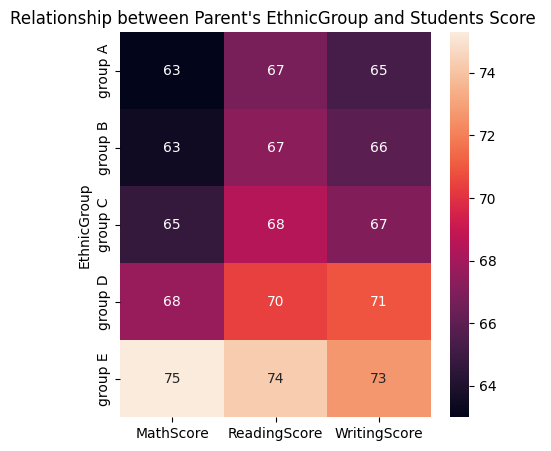

In [68]:
plt.figure(figsize=(5,5))
sns.heatmap(gb2,annot=True)
plt.title("Relationship between Parent's EthnicGroup and Students Score ")
plt.show()

In [110]:
#etnik durumlara göre ebeveynlerin medeni hal durumu gruplaması
ethc_group_marital=df.groupby("EthnicGroup")["ParentMaritalStatus"].value_counts().unstack()

print(ethc_group_marital)

ParentMaritalStatus  divorced  married  single  widowed
EthnicGroup                                            
group A                   371     1190     512       48
group B                   894     3248    1361      102
group C                  1468     5089    2123      178
group D                  1259     4122    1702      135
group E                   641     2212     942       97


In [111]:

#her bir etnik grub için ebeveynlerine göre  en çok görülen medeni durum ve bu medeni durum halinin toplam sayısı.

for etc in df["EthnicGroup"].unique():
    group_data = df[df["EthnicGroup"] == etc]["ParentMaritalStatus"].value_counts().sort_values(ascending=False)

    if not group_data.empty:
        max_marital_count = group_data.max()
        marital_count_max_name = group_data.index[0]
        print(f"{etc} grubu için en sık medeni durum: {marital_count_max_name} (Sayı: {max_marital_count})")
    else:
        print(f"{etc} grubu için veri bulunamadı.")


    

nan grubu için veri bulunamadı.
group C grubu için en sık medeni durum: married (Sayı: 5089)
group B grubu için en sık medeni durum: married (Sayı: 3248)
group A grubu için en sık medeni durum: married (Sayı: 1190)
group D grubu için en sık medeni durum: married (Sayı: 4122)
group E grubu için en sık medeni durum: married (Sayı: 2212)


In [117]:
#etnik gruplar için ebeveyn eğitim durumlarına göre gruplama
ethc_group_edu=df.groupby("EthnicGroup")["ParentEduc"].value_counts().unstack()

print(ethc_group_edu)



ParentEduc   associate's degree  bachelor's degree  high school  \
EthnicGroup                                                       
group A                     404                259          429   
group B                    1067                605         1116   
group C                    1669               1021         1664   
group D                    1339                847         1391   
group E                     727                464          749   

ParentEduc   master's degree  some college  some high school  
EthnicGroup                                                   
group A                  122           473               391  
group B                  404          1219              1059  
group C                  623          1976              1699  
group D                  503          1652              1324  
group E                  254           896               724  


In [114]:
#her bir etnik grup için ebeveyn eğitim durumu ve bu durumun toplam sayısı.

for etc in df["EthnicGroup"].unique():
    ethc_data=df[df["EthnicGroup"]==etc]["ParentEduc"].value_counts().sort_values(ascending=False)

    if not ethc_data.empty:
        max_count=ethc_data.max()
        max_count_name=ethc_data.index[0]
        print(f"{etc} grubu için en sık medeni durum: {max_count_name} (Sayı: {max_count})")


    else:
        print(f"{etc} grubu için veri bulunamadı.")


nan grubu için veri bulunamadı.
group C grubu için en sık medeni durum: some college (Sayı: 1976)
group B grubu için en sık medeni durum: some college (Sayı: 1219)
group A grubu için en sık medeni durum: some college (Sayı: 473)
group D grubu için en sık medeni durum: some college (Sayı: 1652)
group E grubu için en sık medeni durum: some college (Sayı: 896)


In [129]:
#ilk cocuk olup,olmadığına göre ders skorları

firstchild_score=df.groupby("IsFirstChild").agg({"MathScore":'mean',"ReadingScore":'mean',"WritingScore":'mean'})
print(df_den)





              MathScore  ReadingScore  WritingScore
IsFirstChild                                       
no            66.246832     69.132614     68.210887
yes           66.740646     69.542553     68.558484


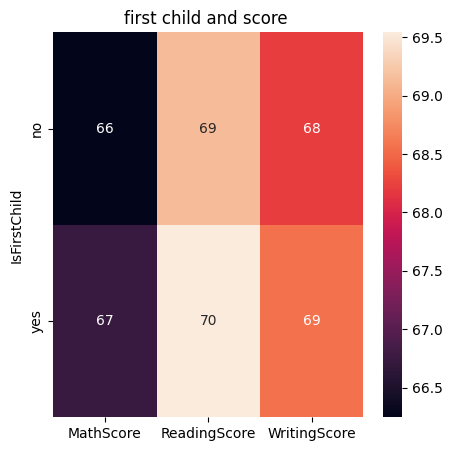

In [130]:
plt.figure(figsize=(5,5))
sns.heatmap(firstchild_score,annot=True)
plt.title("first child and score ")
plt.show()

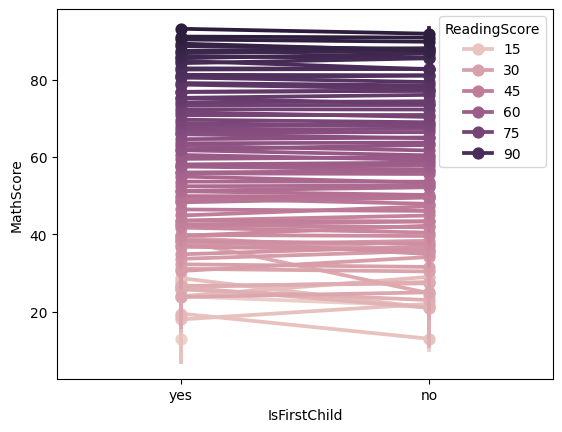

In [137]:
sns.pointplot(x="IsFirstChild", y="MathScore", hue="ReadingScore", data=df)
plt.show()